<div class="alert alert-block alert-success">
    <h1 align="center">Intro to Machine learning</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80% >

## Importing the libraries

In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [47]:
bike_data = pd.read_csv("train.csv")

## EDA

In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
bike_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
bike_data.shape

(10886, 12)

In [41]:
bike_data.groupby('season').count()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,,,,,,,,,,,
1,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686
2,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733
3,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733
4,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734


## Data Preprocessing

In [14]:
bike_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [46]:
# Some Explortion in data for further use
pd.crosstab(bike_data.count , bike_data.windspeed , normalize= "index")*100

windspeed,0.0000,6.0032,7.0015,8.9981,11.0014,12.9980,15.0013,16.9979,19.0012,19.9995,...,36.9974,39.0007,40.9973,43.0006,43.9989,46.0022,47.9988,50.0021,51.9987,56.9969
row_0,,,,,,,,,,,,,,,,,,,,,
<bound method DataFrame.count of datetime season holiday workingday weather temp \\n0 2011-01-01 00:00:00 1 0 0 1 9.84 \n1 2011-01-01 01:00:00 1 0 0 1 9.02 \n2 2011-01-01 02:00:00 1 0 0 1 9.02 \n3 2011-01-01 03:00:00 1 0 0 1 9.84 \n4 2011-01-01 04:00:00 1 0 0 1 9.84 \n... ... ... ... ... ... ... \n10881 2012-12-19 19:00:00 4 0 1 1 15.58 \n10882 2012-12-19 20:00:00 4 0 1 1 14.76 \n10883 2012-12-19 21:00:00 4 0 1 1 13.94 \n10884 2012-12-19 22:00:00 4 0 1 1 13.94 \n10885 2012-12-19 23:00:00 4 0 1 1 13.12 \n\n atemp humidity windspeed casual registered count \n0 14.395 81 0.0000 3 13 16 \n1 13.635 80 0.0000 8 32 40 \n2 13.635 80 0.0000 5 27 32 \n3 14.395 75 0.0000 3 10 13 \n4 14.395 75 0.0000 0 1 1 \n... ... ... ... ... ... ... \n10881 19.695 50 26.0027 7 329 336 \n10882 17.425 57 15.0013 10 231 241 \n10883 15.910 61 15.0013 4 164 168 \n10884 17.425 61 6.0032 12 117 129 \n10885 16.665 66 8.9981 4 84 88 \n\n[10886 rows x 12 columns]>,12.061363,8.010288,9.498438,10.288444,9.709719,9.571927,8.827852,7.569355,6.209811,4.519566,...,0.202094,0.248025,0.101047,0.110233,0.073489,0.027558,0.018372,0.009186,0.009186,0.018372


In [47]:
pd.crosstab(bike_data.count , bike_data.weather , normalize = "index")*100

weather,1,2,3,4
row_0,,,,
<bound method DataFrame.count of datetime season holiday workingday weather temp \\n0 2011-01-01 00:00:00 1 0 0 1 9.84 \n1 2011-01-01 01:00:00 1 0 0 1 9.02 \n2 2011-01-01 02:00:00 1 0 0 1 9.02 \n3 2011-01-01 03:00:00 1 0 0 1 9.84 \n4 2011-01-01 04:00:00 1 0 0 1 9.84 \n... ... ... ... ... ... ... \n10881 2012-12-19 19:00:00 4 0 1 1 15.58 \n10882 2012-12-19 20:00:00 4 0 1 1 14.76 \n10883 2012-12-19 21:00:00 4 0 1 1 13.94 \n10884 2012-12-19 22:00:00 4 0 1 1 13.94 \n10885 2012-12-19 23:00:00 4 0 1 1 13.12 \n\n atemp humidity windspeed casual registered count \n0 14.395 81 0.0000 3 13 16 \n1 13.635 80 0.0000 8 32 40 \n2 13.635 80 0.0000 5 27 32 \n3 14.395 75 0.0000 3 10 13 \n4 14.395 75 0.0000 0 1 1 \n... ... ... ... ... ... ... \n10881 19.695 50 26.0027 7 329 336 \n10882 17.425 57 15.0013 10 231 241 \n10883 15.910 61 15.0013 4 164 168 \n10884 17.425 61 6.0032 12 117 129 \n10885 16.665 66 8.9981 4 84 88 \n\n[10886 rows x 12 columns]>,66.066507,26.033437,7.890869,0.009186


In [49]:
pd.crosstab(bike_data.count , bike_data.datetime , normalize = "index")*100

datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00,2011-01-01 05:00:00,2011-01-01 06:00:00,2011-01-01 07:00:00,2011-01-01 08:00:00,2011-01-01 09:00:00,...,2012-12-19 14:00:00,2012-12-19 15:00:00,2012-12-19 16:00:00,2012-12-19 17:00:00,2012-12-19 18:00:00,2012-12-19 19:00:00,2012-12-19 20:00:00,2012-12-19 21:00:00,2012-12-19 22:00:00,2012-12-19 23:00:00
row_0,,,,,,,,,,,,,,,,,,,,,
<bound method DataFrame.count of datetime season holiday workingday weather temp \\n0 2011-01-01 00:00:00 1 0 0 1 9.84 \n1 2011-01-01 01:00:00 1 0 0 1 9.02 \n2 2011-01-01 02:00:00 1 0 0 1 9.02 \n3 2011-01-01 03:00:00 1 0 0 1 9.84 \n4 2011-01-01 04:00:00 1 0 0 1 9.84 \n... ... ... ... ... ... ... \n10881 2012-12-19 19:00:00 4 0 1 1 15.58 \n10882 2012-12-19 20:00:00 4 0 1 1 14.76 \n10883 2012-12-19 21:00:00 4 0 1 1 13.94 \n10884 2012-12-19 22:00:00 4 0 1 1 13.94 \n10885 2012-12-19 23:00:00 4 0 1 1 13.12 \n\n atemp humidity windspeed casual registered count \n0 14.395 81 0.0000 3 13 16 \n1 13.635 80 0.0000 8 32 40 \n2 13.635 80 0.0000 5 27 32 \n3 14.395 75 0.0000 3 10 13 \n4 14.395 75 0.0000 0 1 1 \n... ... ... ... ... ... ... \n10881 19.695 50 26.0027 7 329 336 \n10882 17.425 57 15.0013 10 231 241 \n10883 15.910 61 15.0013 4 164 168 \n10884 17.425 61 6.0032 12 117 129 \n10885 16.665 66 8.9981 4 84 88 \n\n[10886 rows x 12 columns]>,0.009186,0.009186,0.009186,0.009186,0.009186,0.009186,0.009186,0.009186,0.009186,0.009186,...,0.009186,0.009186,0.009186,0.009186,0.009186,0.009186,0.009186,0.009186,0.009186,0.009186


In [32]:
bike_data['season'].value_counts(normalize = True)*100
# means:
#  4.winter
#  3.fall
#  2.summer 
#  1.spring

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

In [31]:
# Some Explortion in data for further use
bike_data['workingday'].value_counts(normalize=True)*100

1    68.087452
0    31.912548
Name: workingday, dtype: float64

In [33]:
bike_data['holiday'].value_counts(normalize=True)*100

0    97.14312
1     2.85688
Name: holiday, dtype: float64

In [42]:
pd.crosstab( bike_data.casual, bike_data.holiday, normalize= "index")

holiday,0,1
casual,,
0,0.981744,0.018256
1,0.976012,0.023988
2,0.969199,0.030801
3,0.968037,0.031963
4,0.968927,0.031073
...,...,...
356,1.000000,0.000000
357,1.000000,0.000000
361,1.000000,0.000000


In [45]:
pd.crosstab( bike_data.registered, bike_data.holiday, normalize= "index")

holiday,0,1
registered,,
0,1.000000,0.000000
1,0.992593,0.007407
2,0.986667,0.013333
3,0.953846,0.046154
4,0.978947,0.021053
...,...,...
812,1.000000,0.000000
833,1.000000,0.000000
839,1.000000,0.000000


## Strorytelling - Visualization

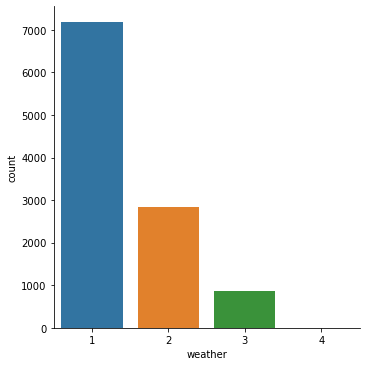

In [52]:
sns.catplot(x="weather", kind="count", data=bike_data)

#  1: Clear, Few clouds, Partly cloudy, Partly cloudy 

#  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 

#  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 

#  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

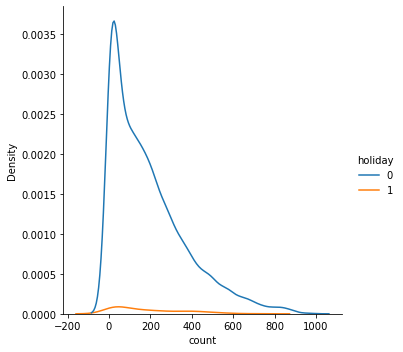

In [58]:
sns.displot(bike_data, x="count", hue='holiday',kind="kde")

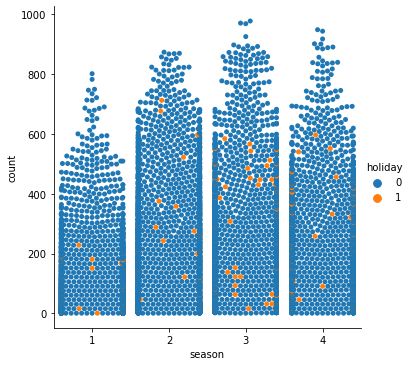

In [7]:
sns.catplot(x="season", y="count", kind="swarm", hue="holiday" , data=bike_data)

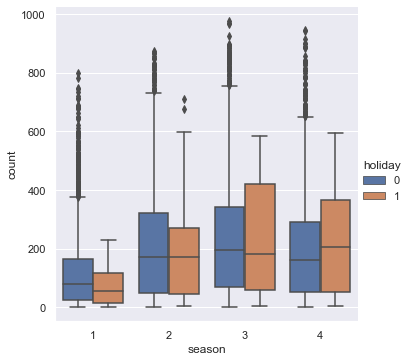

In [22]:
sns.catplot(x="season", y="count", kind="box", hue="holiday" , data=bike_data)

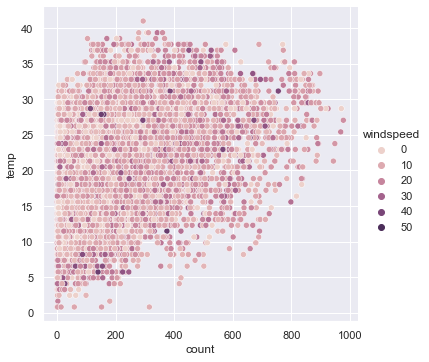

In [18]:
sns.set_theme(style="darkgrid")
sns.relplot(x="count", y="temp", hue="windspeed", data=bike_data)

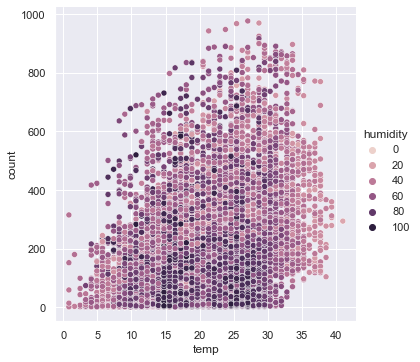

In [20]:
sns.relplot(x="temp", y="count", hue="humidity", data=bike_data)

In [23]:
sns.relplot(x="datetime", y="count", hue="datetime",col="season", data=bike_data)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021AC92EF790> (for post_execute):


KeyboardInterrupt: 

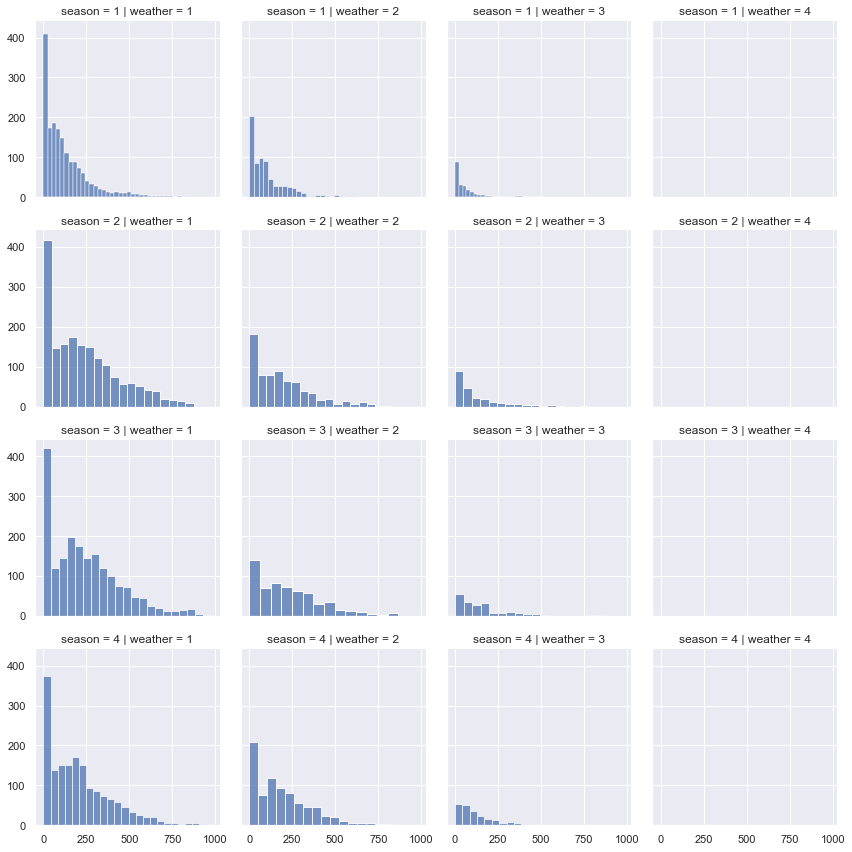

In [27]:
g = sns.FacetGrid(bike_data, col="weather",  row="season")
g.map_dataframe(sns.histplot, x="count")

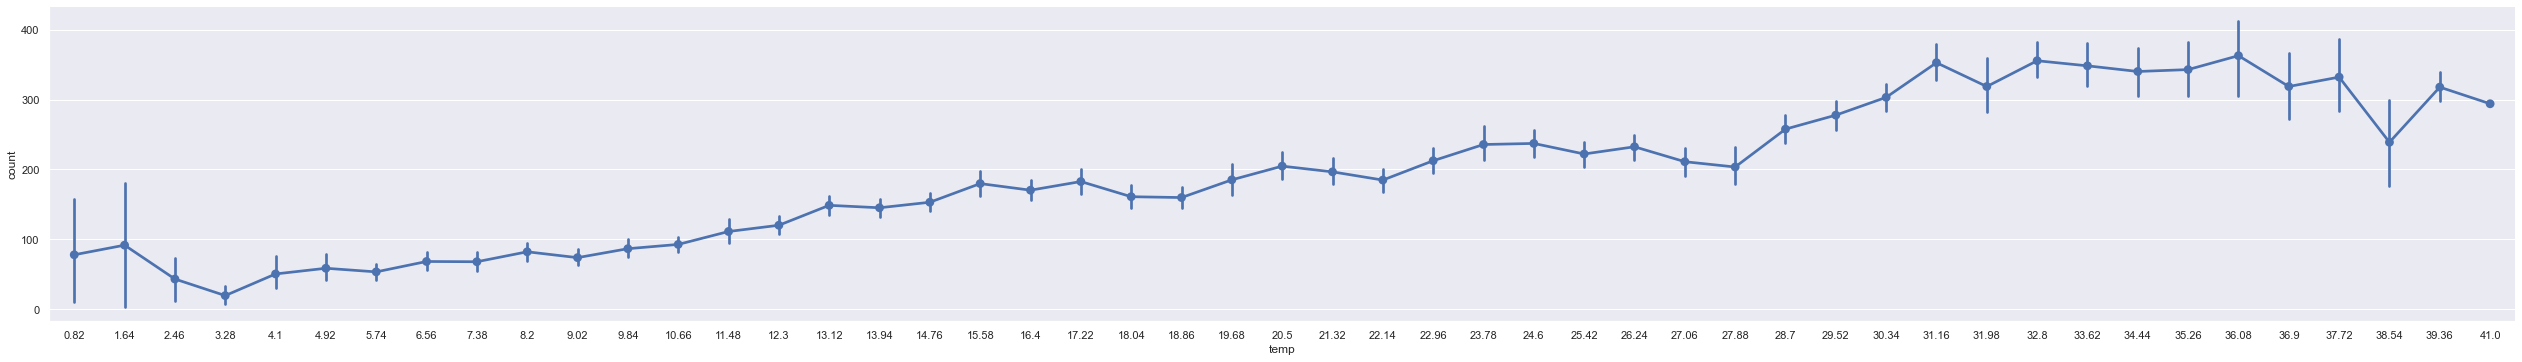

In [37]:
sns.catplot(x="temp", y="count", kind="point", data=bike_data , height = 5 , aspect = 7)
# its visible just open the image in new tab and see the result

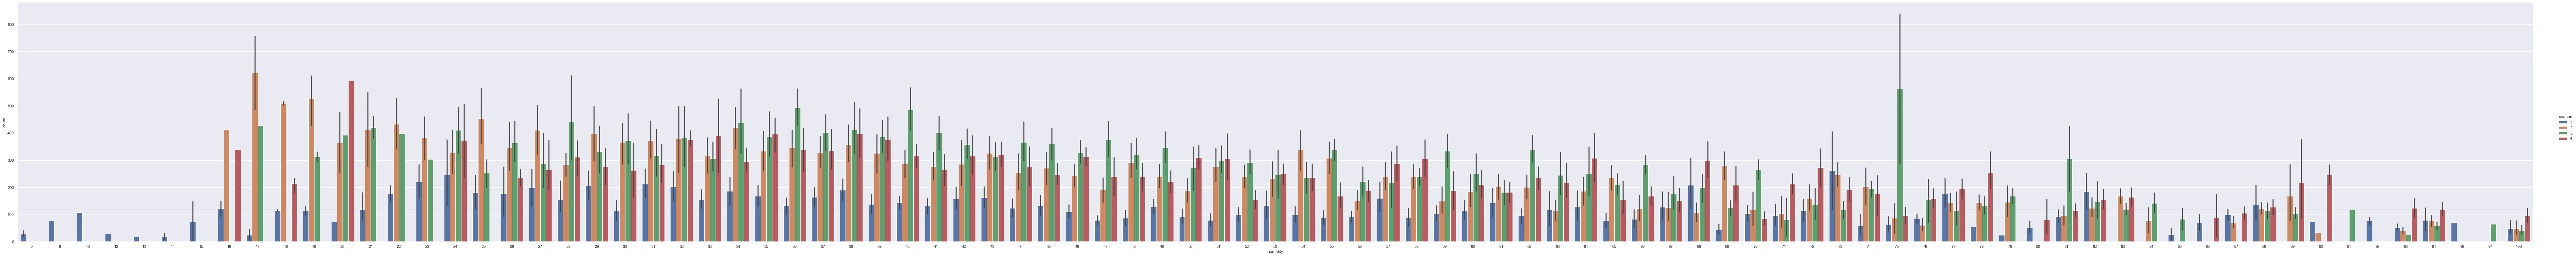

In [39]:
sns.catplot(x="humidity", y="count", kind="bar", data=bike_data , hue = "season" , height = 10 , aspect =10)
# its visible just open the image in new tab and see the result

## Train your model (Regression)

<AxesSubplot:>

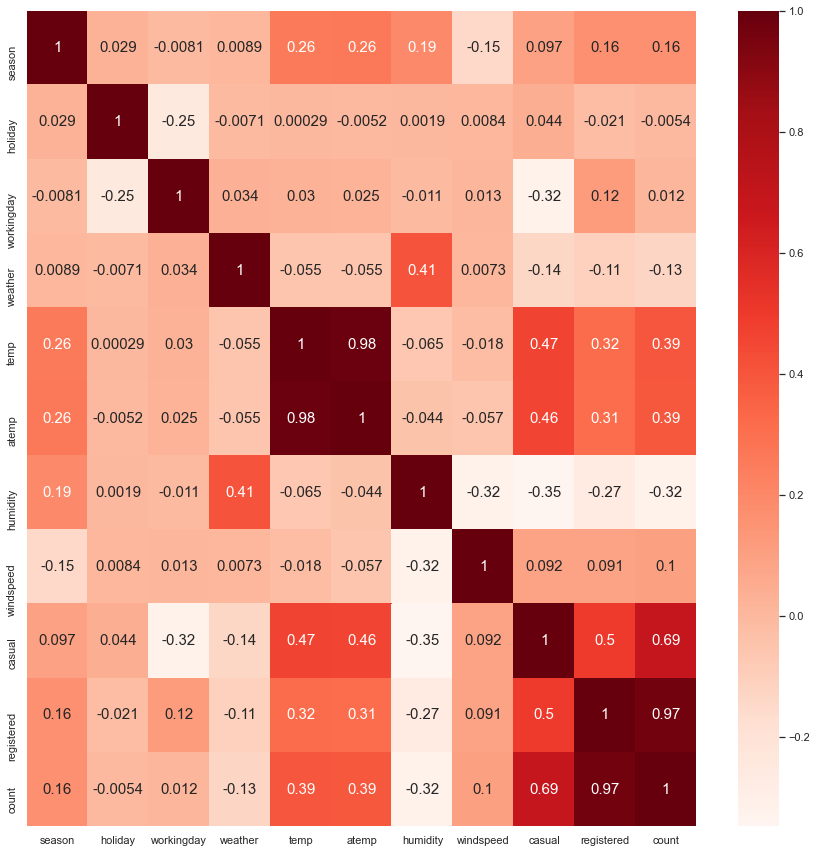

In [83]:
test_correlation = bike_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(test_correlation, annot=True, annot_kws={'size':15}, cmap='Reds' )

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [49]:
X = bike_data[['registered']]
Y = bike_data[['count']]

In [50]:
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=4)

In [51]:
X

,registered
0,13
1,32
2,27
3,10
4,1
...,...
10881,329
10882,231
10883,164
10884,117


In [52]:
Y

,count
0,16
1,40
2,32
3,13
4,1
...,...
10881,336
10882,241
10883,168
10884,129


# SLR

In [53]:
slr_reg_agent = LinearRegression()

In [54]:
slr_reg_agent = slr_reg_agent.fit(X_train, y_train)

In [55]:
predictions = slr_reg_agent.predict(X_test)

In [56]:
predictions

array([[198.90190318],
       [291.96903391],
       [ 23.23769393],
       ...,
       [ 17.42099826],
       [226.8220424 ],
       [382.70948637]])

<AxesSubplot:ylabel='Count'>

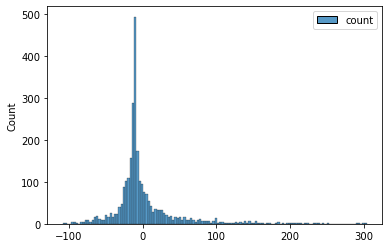

In [57]:
sns.histplot(y_test - predictions)

In [58]:
print("MAE is :" , metrics.mean_absolute_error(y_test, predictions))

MAE is : 26.923772635061596


In [59]:
print("MSE is :" , metrics.mean_squared_error(y_test, predictions))

MSE is : 1975.9526037537164


In [60]:
print("RMSE is :" , np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE is : 44.451688424105065


# MLR

In [61]:
X = bike_data.drop(['count','datetime'], axis = 1)

In [62]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,1,0,0,1,9.84,14.395,81,0.0000,3,13
1,1,0,0,1,9.02,13.635,80,0.0000,8,32
2,1,0,0,1,9.02,13.635,80,0.0000,5,27
3,1,0,0,1,9.84,14.395,75,0.0000,3,10
4,1,0,0,1,9.84,14.395,75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117


In [70]:
y = bike_data[['count']]

In [64]:
y

,count
0,16
1,40
2,32
3,13
4,1
...,...
10881,336
10882,241
10883,168
10884,129


In [65]:
date=pd.get_dummies(bike_data['datetime'])
bike_data = pd.concat([bike_data,date],axis=1)

In [10]:
date

,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00,2011-01-01 05:00:00,2011-01-01 06:00:00,2011-01-01 07:00:00,2011-01-01 08:00:00,2011-01-01 09:00:00,...,2012-12-19 14:00:00,2012-12-19 15:00:00,2012-12-19 16:00:00,2012-12-19 17:00:00,2012-12-19 18:00:00,2012-12-19 19:00:00,2012-12-19 20:00:00,2012-12-19 21:00:00,2012-12-19 22:00:00,2012-12-19 23:00:00
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
X = pd.concat([X,date],axis=1)

In [67]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,2012-12-19 14:00:00,2012-12-19 15:00:00,2012-12-19 16:00:00,2012-12-19 17:00:00,2012-12-19 18:00:00,2012-12-19 19:00:00,2012-12-19 20:00:00,2012-12-19 21:00:00,2012-12-19 22:00:00,2012-12-19 23:00:00
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,...,0,0,0,0,0,1,0,0,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,...,0,0,0,0,0,0,1,0,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,...,0,0,0,0,0,0,0,1,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,...,0,0,0,0,0,0,0,0,1,0


In [91]:
# Splitting to training and testing data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 4)

In [73]:
mlr_reg_agent = LinearRegression()

In [74]:
mlr_reg_agent = mlr_reg_agent.fit(X_train, y_train)

In [75]:
mlr_reg_agent.intercept_

array([-1.4837373])

In [76]:
mlr_reg_agent.coef_

array([[ 1.21853334,  0.68016401,  0.24533336, ..., -2.0698802 ,
        -2.04274224, -2.06779887]])

In [77]:
# Model prediction on train data
y_pred = mlr_reg_agent.predict(X_train)

In [78]:
print('R^2:',metrics.r2_score(y_train, y_pred))

R^2: 1.0


In [79]:
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))

MAE: 5.48279153038447e-13


In [80]:
print('MSE:',metrics.mean_squared_error(y_train, y_pred))

MSE: 1.0521308883176755e-24


In [81]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

RMSE: 1.0257343166325652e-12


# PL

In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
"Creates a polynomial regression model for the given degree"
pl_features = PolynomialFeatures(degree=2)

In [85]:
X_quad_train = pl_features.fit_transform(X_train)
# Lack of memmory !

MemoryError: Unable to allocate 3.53 TiB for an array with shape (8164, 59377753) and data type float64

In [30]:
# quad = LinearRegression()

In [86]:
# quad.fit(X_quad_train, y_train)

NameError: name 'quad' is not defined

In [33]:
# predicting on training data-set
# y_train_predict = quad.predict(X_quad_train)

In [34]:
# predicting on test data-set
# y_test_predict = quad.predict(pl_features.fit_transform(X_test))

In [35]:
# metrics.r2_score(y_train, y_train_predict)

# in meghdar ghablan va be eshtebah mohasebe shde ast

0.25581037891493047

In [37]:
# metrics.r2_score(y_test, y_test_predict)

# in meghdar ghablan va be eshtebah mohasebe shde ast

-3.3756952752888955e-08

# LR

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [92]:
log_reg = LogisticRegression()

In [94]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [95]:
y_pred = log_reg.predict(X_test)

In [96]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of Logistic Regression is:  0.04151359294636297


In [108]:
y_test.to_numpy()

array([[247],
       [286],
       [ 20],
       ...,
       [  6],
       [298],
       [385]], dtype=int64)

In [107]:
y_pred

array([214, 514,  11, ...,   6, 232, 374], dtype=int64)

In [120]:
y_pred.shape # just to stop some error

(2722, 1)

In [119]:
y_pred = y_pred.reshape(2722,1)

In [117]:
y_test.shape

(2722, 1)

In [123]:
error = (y_pred) - (y_test)

<AxesSubplot:ylabel='Count'>

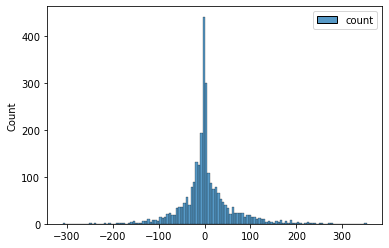

In [124]:
sns.histplot(error)

## Test Result

In [ ]:
# Mohammad Hossein Hashemi